In [91]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Times New Roman']

In [1]:
pip install psycopg2

     |████████████████████████████████| 384 kB 1.1 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-7o89ocoz/psycopg2_1faf70585cdf489cb8a2f838093fa2f0/setup.py'"'"'; __file__='"'"'/tmp/pip-install-7o89ocoz/psycopg2_1faf70585cdf489cb8a2f838093fa2f0/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-86e6s3_y
         cwd: /tmp/pip-install-7o89ocoz/psycopg2_1faf70585cdf489cb8a2f838093fa2f0/
    Complete output (23 lines):
    running egg_info
    creating /tmp/pip-pip-egg-info-86e6s3_y/psycopg2.egg-info
    writing /tmp/pip-pip-egg-info-86e6s3_y/psycopg2.egg-info/PKG-INFO
    writing dependency_

In [2]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install ydata_profiling

     |████████████████████████████████| 357 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 41.3 MB/s eta 0:00:01
     |████████████████████████████████| 409 kB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 86.1 MB/s eta 0:00:01
     |████████████████████████████████| 513 kB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 686 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 85.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 85.2 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 66.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 76.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 85.1 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 93.1 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=80f589cf965443b9fb082a9b47a87e0891a15bb3ad6fa81d450d97059a4c5079
  Stored in director

In [5]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import datetime
import random
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sqlalchemy import create_engine
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

In [7]:
RANDOM_STATE = 42

In [8]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True

## Подключитесь к базе. Загрузите таблицы sql

In [9]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'password': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'dbname': 'data-science-vehicle-db' # название базы данных,
} 

In [10]:
connection_string = f'postgresql+psycopg2://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["dbname"]}'

In [11]:
engine = create_engine(connection_string)

## Проведите первичное исследование таблиц

In [12]:
sql_case_ids = '''
SELECT *
FROM case_ids
LIMIT 500
'''

case_ids_df = pd.read_sql_query(sql_case_ids, connection_string)

In [13]:
case_ids_df.head()

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


In [14]:
case_ids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   case_id  500 non-null    object
 1   db_year  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [15]:
del case_ids_df

In [16]:
sql_vehicles = '''
SELECT *
FROM vehicles
LIMIT 500
'''

vehicles_df = pd.read_sql_query(sql_vehicles, connection_string)

In [17]:
vehicles_df.head()

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3.0
1,1,3858022,1,sedan,auto,3.0
2,1175712,5305030,1,sedan,auto,3.0
3,1175717,5305033,3,sedan,auto,5.0
4,1175722,5305034,2,sedan,auto,5.0


In [18]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    500 non-null    int64  
 1   case_id               500 non-null    object 
 2   party_number          500 non-null    int64  
 3   vehicle_type          500 non-null    object 
 4   vehicle_transmission  496 non-null    object 
 5   vehicle_age           491 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 23.6+ KB


In [19]:
del vehicles_df

In [20]:
sql_collisions = '''
SELECT *
FROM collisions
LIMIT 500
'''

collisions_df = pd.read_sql_query(sql_collisions, connection_string)

In [21]:
collisions_df.head()

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0.0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1.0,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00


In [22]:
collisions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_id                      500 non-null    object 
 1   county_city_location         500 non-null    object 
 2   county_location              500 non-null    object 
 3   distance                     500 non-null    float64
 4   direction                    344 non-null    object 
 5   intersection                 493 non-null    float64
 6   weather_1                    494 non-null    object 
 7   location_type                193 non-null    object 
 8   collision_damage             500 non-null    object 
 9   party_count                  500 non-null    int64  
 10  primary_collision_factor     491 non-null    object 
 11  pcf_violation_category       485 non-null    object 
 12  type_of_collision            495 non-null    object 
 13  motor_vehicle_involv

In [23]:
del collisions_df

In [24]:
sql_parties = '''
SELECT *
FROM parties
LIMIT 500
'''

parties_df = pd.read_sql_query(sql_parties, connection_string)

In [25]:
parties_df.head()

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0.0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0


In [26]:
parties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   500 non-null    int64  
 1   case_id              500 non-null    object 
 2   party_number         500 non-null    int64  
 3   party_type           490 non-null    object 
 4   at_fault             500 non-null    int64  
 5   insurance_premium    182 non-null    float64
 6   party_sobriety       452 non-null    object 
 7   party_drug_physical  267 non-null    object 
 8   cellphone_in_use     264 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [27]:
del parties_df

Все таблицы нормально загружаются согласно ER-диаграмме

Таблицы должны иметь связ по case_id. Эта связь существует

Некоторые выгруженные таблицы имеют пропуски.

##  Проведите статистический анализ факторов ДТП

In [28]:
sql_accidents_month = '''
SELECT EXTRACT(MONTH FROM DATE_TRUNC('month', collision_date)) as month_number,
       DATE_TRUNC('month', collision_date) as month,
       COUNT(case_id) as num_accidents
FROM collisions
WHERE EXTRACT(YEAR FROM collision_date) <= 2012
GROUP BY month_number, month
ORDER BY month
'''

accidents_month_df = pd.read_sql_query(sql_accidents_month, connection_string)

In [29]:
accidents_month_df.head(200)

,month_number,month,num_accidents
0,1.0,2009-01-01 00:00:00+03:00,35062
1,2.0,2009-02-01 00:00:00+03:00,34480
2,3.0,2009-03-01 00:00:00+03:00,36648
3,4.0,2009-04-01 00:00:00+04:00,35239
4,5.0,2009-05-01 00:00:00+04:00,36916
5,6.0,2009-06-01 00:00:00+04:00,34202
6,7.0,2009-07-01 00:00:00+04:00,35161
7,8.0,2009-08-01 00:00:00+04:00,34508
8,9.0,2009-09-01 00:00:00+04:00,35555
9,10.0,2009-10-01 00:00:00+04:00,37835


За 2012, 2013, 2020 неполная/дисбалансная статистика, предлагаю учитывать только года до 2012

In [30]:
accidents_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month_number   48 non-null     float64
 1   month          48 non-null     object 
 2   num_accidents  48 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


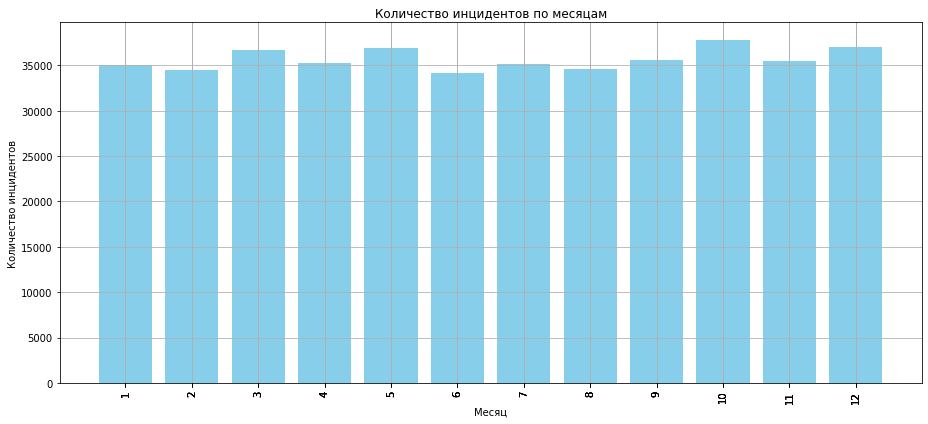

In [31]:
plt.figure(figsize=(13, 6))
plt.bar(accidents_month_df['month_number'], accidents_month_df['num_accidents'], color='skyblue')
plt.title('Количество инцидентов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество инцидентов')
plt.grid(True)
plt.xticks(accidents_month_df['month_number'], rotation=90)
plt.tight_layout()
plt.show()

In [32]:
del accidents_month_df

Полноценная информация о произошедших авариях имеется только с 2009 г по 2013 г. После, количество инцидентов резко падает. Предполагаю, что информацию перестали собирать в это время.

Наибольшее количество аварий происходит в октябре, наименьшее в июне

В целом, общее распределение количества аварий по месяцам выглядит равномерным

Задача для аналитики коллегам:

1) Проведите анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП
2) Проведите анализ серьезности повреждений транспортного средства, исходя из типа кузова транспортного средства
3) Проведите анализ основного фактора аварий, исходя из трезвости участника
4) Проведите анализ основного фактора аварий, исходя из трезвости участника
5) Проведите анализ основного фактора аварий, исходя из наличия телефона в автомобиле
6) Проведите анализ кпп автомобиля, исходя из состояния дороги


Примерный алгоритм выполнения задач:
1) Выгружаем из БД sql запросом необходимые столбцы
2) Выводим графики
3) Анализируем

На себя возьму задачи 1, 5, 6

Анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП

In [35]:
sql_accidents_road_surface = '''
SELECT collision_damage, COUNT(collision_damage) as collision_damage_count, road_surface
FROM collisions
GROUP BY road_surface, collision_damage
HAVING road_surface IS NOT NULL
'''

In [36]:
accidents_road_surface_df = pd.read_sql_query(sql_accidents_road_surface, connection_string)

In [37]:
accidents_road_surface_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   collision_damage        20 non-null     object
 1   collision_damage_count  20 non-null     int64 
 2   road_surface            20 non-null     object
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


In [38]:
accidents_road_surface_df.head(10)

,collision_damage,collision_damage_count,road_surface
0,fatal,9823,dry
1,middle damage,151015,dry
2,scratch,307963,dry
3,severe damage,27827,dry
4,small damage,745398,dry
5,fatal,12,slippery
6,middle damage,238,slippery
7,scratch,308,slippery
8,severe damage,64,slippery
9,small damage,762,slippery


Запрос в БД для вывода количества типа повреждений в зависимости от поверхности

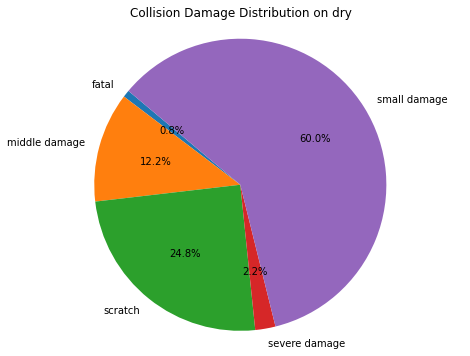

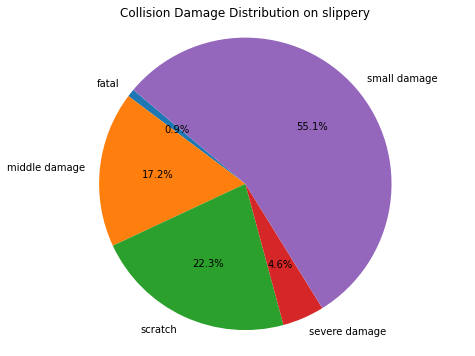

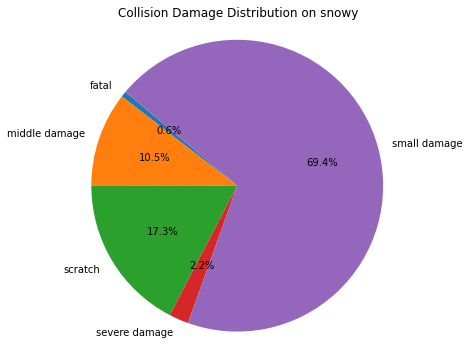

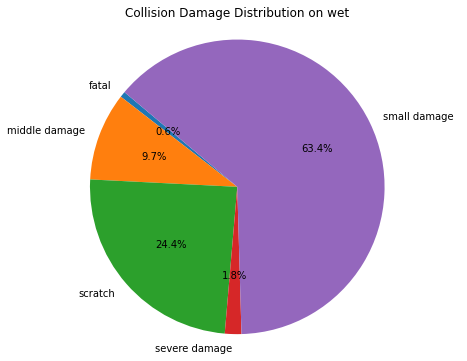

In [39]:
for road_surface in accidents_road_surface_df['road_surface'].unique():
    filtered_df = accidents_road_surface_df[accidents_road_surface_df['road_surface'] == road_surface]

    plt.figure(figsize=(8, 6))
    plt.pie(filtered_df['collision_damage_count'], labels=filtered_df['collision_damage'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Collision Damage Distribution on {road_surface}')
    plt.axis('equal')
    plt.show()

In [40]:
del accidents_road_surface_df

Как видно из диаграмм, повреждения от погоды имеет примерно одинаковый характер распределения, большая часть аварий - scratch и small damage. Однако при Slippery покрытии, возрастает процент middle и severe damage

Анализ основного фактора аварий, исходя из наличия телефона в автомобиле

In [41]:
sql_accidents_phone = '''
SELECT c.primary_collision_factor, p.cellphone_in_use, COUNT(p.cellphone_in_use) as amount
FROM parties p
JOIN collisions c ON p.case_id = c.case_id
WHERE c.primary_collision_factor IS NOT NULL AND p.cellphone_in_use IS NOT NULL
GROUP BY c.primary_collision_factor, p.cellphone_in_use
'''

In [43]:
accidents_phone_df = pd.read_sql_query(sql_accidents_phone, connection_string)

In [44]:
accidents_phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   primary_collision_factor  10 non-null     object
 1   cellphone_in_use          10 non-null     int64 
 2   amount                    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [45]:
accidents_phone_df.head(15)

,primary_collision_factor,cellphone_in_use,amount
0,fell asleep,0,30
1,fell asleep,1,3
2,other improper driving,0,9940
3,other improper driving,1,196
4,other than driver,0,35403
5,other than driver,1,647
6,unknown,0,44742
7,unknown,1,757
8,vehicle code violation,0,2097867
9,vehicle code violation,1,44038


Запрос в БД для вывода количества присутсвовавшх телефонов при конкретном факторе

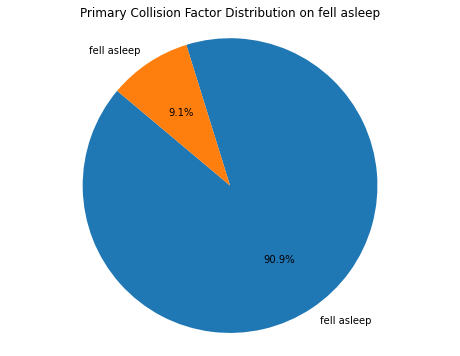

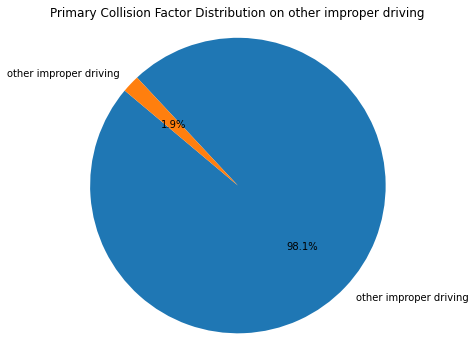

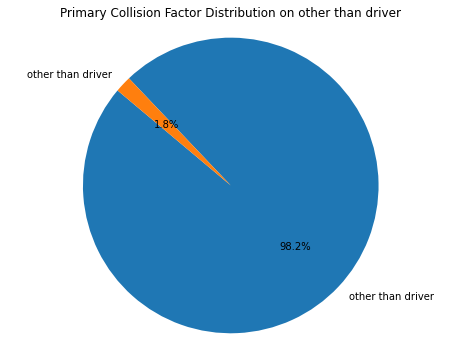

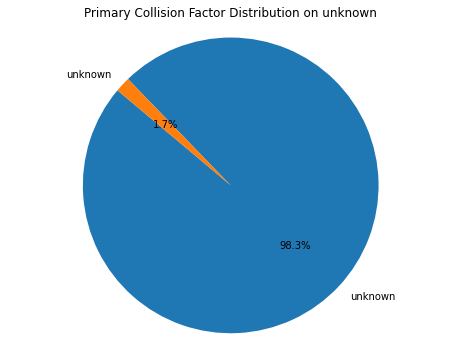

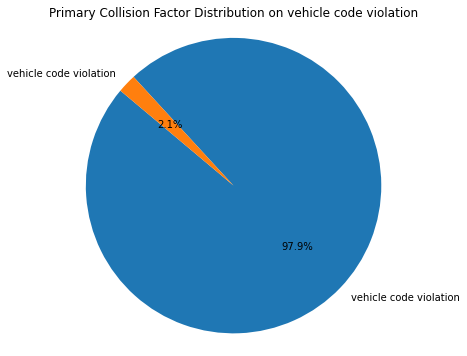

In [46]:
for factor in accidents_phone_df['primary_collision_factor'].unique():
    filtered_df = accidents_phone_df[accidents_phone_df['primary_collision_factor'] == factor]

    plt.figure(figsize=(8, 6))
    plt.pie(filtered_df['amount'], labels=filtered_df['primary_collision_factor'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Primary Collision Factor Distribution on {factor}')
    plt.axis('equal')  
    plt.show()

In [47]:
del accidents_phone_df

Как видно фактор ДТП не зависит напрямую от наличия телефона, можно лишь сделать вывод, что в подавляющем количесте ДТП телефон присутствовал

Fнализ кпп автомобиля, исходя из состояния дороги

In [48]:
sql_transmission = '''
SELECT c.road_surface, v.vehicle_transmission, COUNT(v.VEHICLE_TRANSMISSION) as amount
FROM vehicles v
JOIN collisions c ON v.case_id = c.case_id
WHERE c.road_surface IS NOT NULL AND v.vehicle_transmission IS NOT NULL
GROUP BY c.road_surface, v.vehicle_transmission
'''

In [49]:
transmission_df = pd.read_sql_query(sql_transmission, connection_string)

In [50]:
transmission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   road_surface          8 non-null      object
 1   vehicle_transmission  8 non-null      object
 2   amount                8 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [51]:
transmission_df

,road_surface,vehicle_transmission,amount
0,dry,auto,450249
1,dry,manual,445186
2,slippery,auto,361
3,slippery,manual,522
4,snowy,auto,2468
5,snowy,manual,2457
6,wet,auto,45041
7,wet,manual,43034


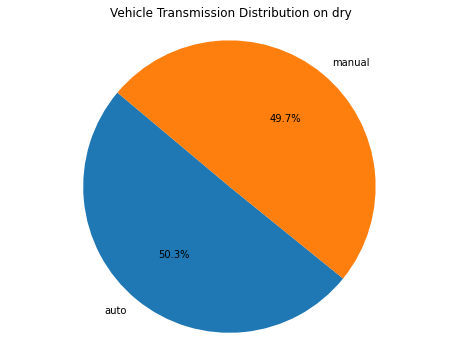

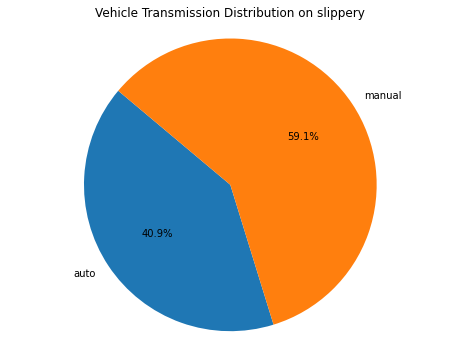

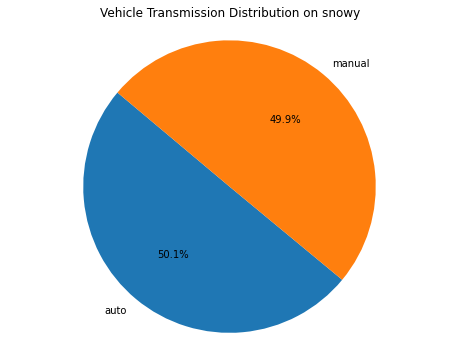

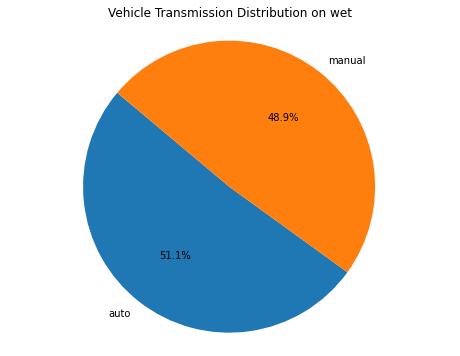

In [52]:
for surface in transmission_df['road_surface'].unique():
    filtered_df = transmission_df[transmission_df['road_surface'] == surface]

    plt.figure(figsize=(8, 6))
    plt.pie(filtered_df['amount'], labels=filtered_df['vehicle_transmission'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Vehicle Transmission Distribution on {surface}')
    plt.axis('equal')  
    plt.show()

In [53]:
del transmission_df

Аналогично умирает ядро, но графики раньше выводились

Как видно из диаграмм, тип КПП не влияет на ДТП в зависимости от состояния дороги. Есть небольшой дисбаланс на скользкой дороге, но это может быть связано с малым количеством данных для этого конкретно покрытия.

Остальные задачи оставляю для реализации коллегам.

## Создайте модель для оценки водительского риска

1. party_number - признак, появившийся в результате ДТП, для предсказания не поможет
2. at_fault - целевой признак
3. insurance_premium - объем страховки, оставляем
4. party_sobriety - трезвость, однозначно нет информации, был ли водитель трезв перед поездкой, но мы оставим, т.к. это очевидно может повлиять на дтп
5. party_drug_physical - аналогично с предыдущим признаком, оставляем
6. cellphone_in_use - в 21 веке почти у всех есть телефон. Как показало мое исследование выше, почти все аварии были с телефоном, так что можно удалить
7. county_location - оставим, водители некоторых регионов могут быть более темпераментные при вождении
8. county_city_location - удалим
9. distance - не уверен, что нужно, т.к. аварии происходят на всех дорогах
10. intersection - оставим, перекрески являются местом повышенной опасности
11. weather_1 - оставим, погоду можно предугадать
12. location_type - удалим
13. collision_damage - удалим
14. party_count - удалим
15. primary_collision_factor - удалим
16. pcf_violation_category - удалим
17. type_of_collision - удалим
18. motor_vehicle_involved_with - удалим
19. road_surface - оставим, тип поверхности можно предугадать
20. road_condition_1 - оставим, дорожное состояние можно предугадать
21. lighting - оставим, освещение можно предугадать
22. control_device - удалим
23. collision_date - оставим, дата поездки известна
24. collision_time - оставим, время поездки известно
25. party_number - удалим
26. vehicle_type - оставляем, заранее известно
27. vehicle_transmission - оставляем, заранее известно
28. vehicle_age - оставляем, требование заказчика

В конечноим итоге большую часть признаков, полученых по факту ДТП можно удалить

In [39]:
sql_data = '''
SELECT p.at_fault, 
       p.insurance_premium, 
       p.party_sobriety, 
       p.party_drug_physical, 
       c.county_location, 
       c.intersection, 
       c.weather_1,
       c.road_surface, 
       c.road_condition_1, 
       c.lighting, 
       c.collision_date, 
       c.collision_time, 
       v.vehicle_type, 
       v.vehicle_transmission,
       v.vehicle_age
FROM Parties p
INNER JOIN Collisions c ON p.case_id = c.case_id
INNER JOIN Vehicles v ON v.case_id = c.case_id AND v.party_number = p.party_number
WHERE p.PARTY_TYPE = 'car' 
      AND c.COLLISION_DAMAGE != 'scratch' 
      AND DATE_PART('year', c.COLLISION_DATE) = 2012
      AND v.vehicle_age <= 10
'''

In [40]:
data = pd.read_sql_query(sql_data, connection_string)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51413 entries, 0 to 51412
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   at_fault              51413 non-null  int64  
 1   insurance_premium     51002 non-null  float64
 2   party_sobriety        50631 non-null  object 
 3   party_drug_physical   2550 non-null   object 
 4   county_location       51413 non-null  object 
 5   intersection          51256 non-null  float64
 6   weather_1             51258 non-null  object 
 7   road_surface          51107 non-null  object 
 8   road_condition_1      51191 non-null  object 
 9   lighting              51267 non-null  object 
 10  collision_date        51413 non-null  object 
 11  collision_time        51333 non-null  object 
 12  vehicle_type          51413 non-null  object 
 13  vehicle_transmission  50878 non-null  object 
 14  vehicle_age           51413 non-null  int64  
dtypes: float64(2), int6

In [42]:
data.duplicated().sum()

20

In [47]:
data = data.drop_duplicates()

In [48]:
data.duplicated().sum()

0

In [49]:
data.head(10)

,at_fault,insurance_premium,party_sobriety,party_drug_physical,county_location,intersection,weather_1,road_surface,road_condition_1,lighting,collision_date,collision_time,vehicle_type,vehicle_transmission,vehicle_age
0,1,61.0,had not been drinking,None,orange,0.0,clear,dry,obstruction,daylight,2012-01-28,09:10:00,sedan,manual,9
1,0,46.0,had not been drinking,None,los angeles,0.0,clear,dry,normal,daylight,2012-04-15,17:05:00,sedan,auto,2
2,1,38.0,"had been drinking, under influence",None,san mateo,0.0,clear,dry,other,dark with no street lights,2012-05-01,00:01:00,sedan,auto,5
3,1,43.0,had not been drinking,None,san bernardino,0.0,clear,dry,normal,dark with street lights,2012-04-19,22:04:00,sedan,auto,8
4,1,38.0,"had been drinking, under influence",None,nevada,0.0,clear,dry,normal,dark with no street lights,2012-04-21,00:50:00,sedan,auto,6
5,1,22.0,had not been drinking,None,solano,0.0,cloudy,dry,normal,daylight,2012-01-02,15:32:00,sedan,manual,3
6,1,30.0,had not been drinking,None,san joaquin,0.0,fog,dry,normal,dark with no street lights,2012-01-01,03:00:00,sedan,manual,3
7,1,26.0,had not been drinking,None,santa barbara,0.0,clear,dry,normal,dusk or dawn,2012-01-02,17:08:00,sedan,manual,4
8,0,29.0,had not been drinking,None,los angeles,0.0,clear,dry,normal,daylight,2012-04-07,11:40:00,sedan,auto,4
9,1,20.0,had not been drinking,None,los angeles,0.0,clear,dry,normal,daylight,2012-01-08,15:25:00,sedan,manual,3


In [51]:
data_rework = data.copy()

Выгруженна дата с учетом требований заказчика

In [54]:
data_rework['collision_date'] = data_rework['collision_date'].apply(lambda x: datetime.datetime.combine(x, datetime.time.min))

In [55]:
data_rework['collision_time'] = data_rework['collision_time'].apply(lambda x: x.hour if x is not None else None)

In [56]:
data_rework.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51393 entries, 0 to 51412
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   at_fault              51393 non-null  int64         
 1   insurance_premium     50982 non-null  float64       
 2   party_sobriety        50611 non-null  object        
 3   party_drug_physical   2550 non-null   object        
 4   county_location       51393 non-null  object        
 5   intersection          51236 non-null  float64       
 6   weather_1             51238 non-null  object        
 7   road_surface          51087 non-null  object        
 8   road_condition_1      51171 non-null  object        
 9   lighting              51247 non-null  object        
 10  collision_date        51393 non-null  datetime64[ns]
 11  collision_time        51313 non-null  float64       
 12  vehicle_type          51393 non-null  object        
 13  vehicle_transmis

In [57]:
data_rework.head(10)

,at_fault,insurance_premium,party_sobriety,party_drug_physical,county_location,intersection,weather_1,road_surface,road_condition_1,lighting,collision_date,collision_time,vehicle_type,vehicle_transmission,vehicle_age
0,1,61.0,had not been drinking,None,orange,0.0,clear,dry,obstruction,daylight,2012-01-28,9.0,sedan,manual,9
1,0,46.0,had not been drinking,None,los angeles,0.0,clear,dry,normal,daylight,2012-04-15,17.0,sedan,auto,2
2,1,38.0,"had been drinking, under influence",None,san mateo,0.0,clear,dry,other,dark with no street lights,2012-05-01,0.0,sedan,auto,5
3,1,43.0,had not been drinking,None,san bernardino,0.0,clear,dry,normal,dark with street lights,2012-04-19,22.0,sedan,auto,8
4,1,38.0,"had been drinking, under influence",None,nevada,0.0,clear,dry,normal,dark with no street lights,2012-04-21,0.0,sedan,auto,6
5,1,22.0,had not been drinking,None,solano,0.0,cloudy,dry,normal,daylight,2012-01-02,15.0,sedan,manual,3
6,1,30.0,had not been drinking,None,san joaquin,0.0,fog,dry,normal,dark with no street lights,2012-01-01,3.0,sedan,manual,3
7,1,26.0,had not been drinking,None,santa barbara,0.0,clear,dry,normal,dusk or dawn,2012-01-02,17.0,sedan,manual,4
8,0,29.0,had not been drinking,None,los angeles,0.0,clear,dry,normal,daylight,2012-04-07,11.0,sedan,auto,4
9,1,20.0,had not been drinking,None,los angeles,0.0,clear,dry,normal,daylight,2012-01-08,15.0,sedan,manual,3


In [58]:
profile = ProfileReport(data_rework, title="Profiling Report")

In [60]:
#profile

По результатам выведеной статистики, имеются дубликаты. Поскольку уже была проведена проверка на полные совпадения, удалять имеющиеся нет необходимости. Данные совпадения могут случиться.

Согласно выведенной статистике, в данных имеется большое количество пропусктв. Попробую с ними разобраться.

In [61]:
data_rework['party_sobriety'].unique()

array(['had not been drinking', 'had been drinking, under influence',
       None, 'impairment unknown',
       'had been drinking, not under influence', 'not applicable',
       'had been drinking, impairment unknown'], dtype=object)

Предположу, что пропуски тут возникли из-за того, что трезвость водителя не оценивалась, так что пропуски заполню not applicable

In [62]:
data_rework.loc[data_rework['party_sobriety'].isna(), 'party_sobriety'] = 'not applicable'

In [63]:
data_rework['party_drug_physical'].unique()

array([None, 'G', 'under drug influence', 'sleepy/fatigued',
       'not applicable', 'impairment - physical'], dtype=object)

Аналогичная ситуация, состояние водителя не оценивалось.

In [64]:
data_rework.loc[data_rework['party_drug_physical'].isna(), 'party_drug_physical'] = 'G'

Поскольку мы живем в 21 веке, телефоны есть уже у всех, предлагаю заполнить модой

In [85]:
data_rework['collision_time'].isna().sum()

80

В данной категории пропусков 1,6%, предлагаю строки с пропусками удалить

In [86]:
data_rework.dropna(inplace=True)

In [87]:
profile_2 = ProfileReport(data_rework, title="Profiling Report")

In [93]:
#profile_2

## Проведите анализ важности факторов ДТП

In [94]:
data_rework.head(10)

,at_fault,insurance_premium,party_sobriety,party_drug_physical,county_location,intersection,weather_1,road_surface,road_condition_1,lighting,collision_date,collision_time,vehicle_type,vehicle_transmission,vehicle_age
0,1,61.0,had not been drinking,G,orange,0.0,clear,dry,obstruction,daylight,2012-01-28,9.0,sedan,manual,9
1,0,46.0,had not been drinking,G,los angeles,0.0,clear,dry,normal,daylight,2012-04-15,17.0,sedan,auto,2
2,1,38.0,"had been drinking, under influence",G,san mateo,0.0,clear,dry,other,dark with no street lights,2012-05-01,0.0,sedan,auto,5
3,1,43.0,had not been drinking,G,san bernardino,0.0,clear,dry,normal,dark with street lights,2012-04-19,22.0,sedan,auto,8
4,1,38.0,"had been drinking, under influence",G,nevada,0.0,clear,dry,normal,dark with no street lights,2012-04-21,0.0,sedan,auto,6
5,1,22.0,had not been drinking,G,solano,0.0,cloudy,dry,normal,daylight,2012-01-02,15.0,sedan,manual,3
6,1,30.0,had not been drinking,G,san joaquin,0.0,fog,dry,normal,dark with no street lights,2012-01-01,3.0,sedan,manual,3
7,1,26.0,had not been drinking,G,santa barbara,0.0,clear,dry,normal,dusk or dawn,2012-01-02,17.0,sedan,manual,4
8,0,29.0,had not been drinking,G,los angeles,0.0,clear,dry,normal,daylight,2012-04-07,11.0,sedan,auto,4
9,1,20.0,had not been drinking,G,los angeles,0.0,clear,dry,normal,daylight,2012-01-08,15.0,sedan,manual,3


Попробуем разобраться в признаках, которые могут влиять на вероятность ДТП:

Я предполагаю, что от меня требовалось бы написать SQL запрос, но, поскольку я уже предобработал data, я возьму копию ее, удалив лишние столбцы

***неактуально***

In [96]:
data_work = data_rework.copy()

In [97]:
data_work['intersection'] = data_work['intersection'].astype('object')

In [98]:
data_work['collision_time'] = data_work['collision_time'].astype('object')

In [99]:
data_work['day_of_week'] = data_work['collision_date'].dt.dayofweek.astype('object')

In [100]:
data_work['month'] = data_work['collision_date'].dt.dayofweek.astype('object')

In [101]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

In [102]:
data_work['season'] = data_work['collision_date'].dt.month.apply(get_season)

In [103]:
data_work = data_work.drop('collision_date', axis=1)

In [104]:
data_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49595 entries, 0 to 51412
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   at_fault              49595 non-null  int64  
 1   insurance_premium     49595 non-null  float64
 2   party_sobriety        49595 non-null  object 
 3   party_drug_physical   49595 non-null  object 
 4   county_location       49595 non-null  object 
 5   intersection          49595 non-null  object 
 6   weather_1             49595 non-null  object 
 7   road_surface          49595 non-null  object 
 8   road_condition_1      49595 non-null  object 
 9   lighting              49595 non-null  object 
 10  collision_time        49595 non-null  object 
 11  vehicle_type          49595 non-null  object 
 12  vehicle_transmission  49595 non-null  object 
 13  vehicle_age           49595 non-null  int64  
 14  day_of_week           49595 non-null  object 
 15  month              

In [105]:
data_work.head(10)

,at_fault,insurance_premium,party_sobriety,party_drug_physical,county_location,intersection,weather_1,road_surface,road_condition_1,lighting,collision_time,vehicle_type,vehicle_transmission,vehicle_age,day_of_week,month,season
0,1,61.0,had not been drinking,G,orange,0.0,clear,dry,obstruction,daylight,9.0,sedan,manual,9,5,5,winter
1,0,46.0,had not been drinking,G,los angeles,0.0,clear,dry,normal,daylight,17.0,sedan,auto,2,6,6,spring
2,1,38.0,"had been drinking, under influence",G,san mateo,0.0,clear,dry,other,dark with no street lights,0.0,sedan,auto,5,1,1,spring
3,1,43.0,had not been drinking,G,san bernardino,0.0,clear,dry,normal,dark with street lights,22.0,sedan,auto,8,3,3,spring
4,1,38.0,"had been drinking, under influence",G,nevada,0.0,clear,dry,normal,dark with no street lights,0.0,sedan,auto,6,5,5,spring
5,1,22.0,had not been drinking,G,solano,0.0,cloudy,dry,normal,daylight,15.0,sedan,manual,3,0,0,winter
6,1,30.0,had not been drinking,G,san joaquin,0.0,fog,dry,normal,dark with no street lights,3.0,sedan,manual,3,6,6,winter
7,1,26.0,had not been drinking,G,santa barbara,0.0,clear,dry,normal,dusk or dawn,17.0,sedan,manual,4,0,0,winter
8,0,29.0,had not been drinking,G,los angeles,0.0,clear,dry,normal,daylight,11.0,sedan,auto,4,5,5,spring
9,1,20.0,had not been drinking,G,los angeles,0.0,clear,dry,normal,daylight,15.0,sedan,manual,3,6,6,winter


С этой датой буду работать

In [106]:
df_work = data_work.copy()

In [107]:
profile_3 = ProfileReport(df_work, title="Profiling Report")

In [109]:
del data_work

In [110]:
X = df_work.drop(columns='at_fault')
y = df_work['at_fault']

Разделение выборки на целевой признак и признаки (y и Х соответственно)

In [111]:
X.head(5)

,insurance_premium,party_sobriety,party_drug_physical,county_location,intersection,weather_1,road_surface,road_condition_1,lighting,collision_time,vehicle_type,vehicle_transmission,vehicle_age,day_of_week,month,season
0,61.0,had not been drinking,G,orange,0.0,clear,dry,obstruction,daylight,9.0,sedan,manual,9,5,5,winter
1,46.0,had not been drinking,G,los angeles,0.0,clear,dry,normal,daylight,17.0,sedan,auto,2,6,6,spring
2,38.0,"had been drinking, under influence",G,san mateo,0.0,clear,dry,other,dark with no street lights,0.0,sedan,auto,5,1,1,spring
3,43.0,had not been drinking,G,san bernardino,0.0,clear,dry,normal,dark with street lights,22.0,sedan,auto,8,3,3,spring
4,38.0,"had been drinking, under influence",G,nevada,0.0,clear,dry,normal,dark with no street lights,0.0,sedan,auto,6,5,5,spring


In [112]:
y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: at_fault, dtype: int64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

Разделение выборки на train val test

In [115]:
cat_features = []
num_features = []
target='at_fault'

In [116]:
for column in df_work:
    if df_work[column].dtype == 'object':
        cat_features.append(column)
    else:
        num_features.append(column)
        
num_features.remove(target)

In [117]:
cat_features

['party_sobriety',
 'party_drug_physical',
 'county_location',
 'intersection',
 'weather_1',
 'road_surface',
 'road_condition_1',
 'lighting',
 'collision_time',
 'vehicle_type',
 'vehicle_transmission',
 'day_of_week',
 'month',
 'season']

In [118]:
num_features

['insurance_premium', 'vehicle_age']

Определение категориальный и количественные признаки

In [119]:
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse=False))
])
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('num', numeric_transformer, num_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

Обработчик данных. Для категориальных - ОНЕ, для численных - MinMax 

In [121]:
X_train_transform = pipeline.fit_transform(X_train)
X_test_transform = pipeline.transform(X_test)

Трансформирую выборки

In [122]:
pd.DataFrame(X_train_transform).head(5)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.504762,0.8
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.266667,0.4
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.485714,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.228571,0.5
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.533333,0.6


In [124]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [126]:
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

Взвешивание классов

In [127]:
linear_model = LogisticRegression(solver='lbfgs', 
                                  max_iter=1500, 
                                  penalty='l2', 
                                  random_state=RANDOM_STATE, 
                                  class_weight=class_weights_dict)

Определяю модель линейной классификации

In [128]:
param_grid_linear = {'C': [10]}
grid_search_linear = GridSearchCV(estimator=linear_model, param_grid=param_grid_linear, cv=5, scoring='f1')

Для поиска лучше модели воспользуюсь гридом. Тут я уже подобрал наиболее качественную модель по F1 метрике.

In [129]:
%%time

grid_search_linear.fit(X_train_transform, y_train)

CPU times: user 1min 21s, sys: 46.3 s, total: 2min 7s
Wall time: 2min 7s


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 1.0068006496142916,
                                                        1: 0.9932906068495895},
                                          max_iter=1500, random_state=42),
             param_grid={'C': [10]}, scoring='f1')

In [130]:
best_model_linear = grid_search_linear.best_estimator_
best_params_linear = grid_search_linear.best_params_
f1_score_best_model = grid_search_linear.best_score_

In [131]:
best_params_linear

{'C': 10}

In [132]:
print("F1 Score:", f1_score_best_model)

F1 Score: 0.6053308362726155


F1 метрика 0,60 на лучшей модели. Неплохо!

In [133]:
catboost_model = CatBoostClassifier()

Определю модель градиентного бустинга.

In [134]:
param_grid_catboost = {
    'learning_rate': [0.1],
    'depth': [4],
    'l2_leaf_reg': [3]
}

grid_search_catboost = GridSearchCV(estimator=catboost_model, 
                                    param_grid=param_grid_catboost, 
                                    cv=5, 
                                    scoring='f1')

Поиск лучшей модели также буду осуществлять при помощи грида. Сейчас в гриде выведены параметры для лучшей модели

In [135]:
%%time

grid_search_catboost.fit(X_train_transform, y_train, eval_set=(X_test_transform, y_test), verbose=35)

0:	learn: 0.6765939	test: 0.6772208	best: 0.6772208 (0)	total: 55.5ms	remaining: 55.4s
35:	learn: 0.5977769	test: 0.6030782	best: 0.6030782 (35)	total: 335ms	remaining: 8.96s
70:	learn: 0.5923471	test: 0.5997265	best: 0.5997265 (70)	total: 609ms	remaining: 7.97s
105:	learn: 0.5893285	test: 0.5988531	best: 0.5988531 (105)	total: 1.01s	remaining: 8.51s
140:	learn: 0.5862439	test: 0.5985381	best: 0.5985080 (131)	total: 1.32s	remaining: 8.06s
175:	learn: 0.5837807	test: 0.5985656	best: 0.5984921 (167)	total: 1.6s	remaining: 7.51s
210:	learn: 0.5813350	test: 0.5986471	best: 0.5984228 (195)	total: 1.88s	remaining: 7.02s
245:	learn: 0.5793110	test: 0.5985652	best: 0.5984228 (195)	total: 2.14s	remaining: 6.56s
280:	learn: 0.5774192	test: 0.5988134	best: 0.5984228 (195)	total: 2.41s	remaining: 6.16s
315:	learn: 0.5756338	test: 0.5990802	best: 0.5984228 (195)	total: 2.67s	remaining: 5.79s
350:	learn: 0.5741095	test: 0.5995564	best: 0.5984228 (195)	total: 2.96s	remaining: 5.47s
385:	learn: 0.5726

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f72f35ac130>,
             param_grid={'depth': [4], 'l2_leaf_reg': [3],
                         'learning_rate': [0.1]},
             scoring='f1')

In [137]:
best_model_catboost = grid_search_catboost.best_estimator_
best_params_catboost = grid_search_catboost.best_params_
f1_score_best_model_catboost = grid_search_catboost.best_score_

In [140]:
best_params_catboost

{'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [141]:
print("F1 Score:", f1_score_best_model_catboost)

F1 Score: 0.6357506884949138


F1 метрика 0,65. Точность выше чем у линейной классификации

In [142]:
X_train_torch = torch.FloatTensor(X_train_transform)
X_test_torch = torch.FloatTensor(X_test_transform)
y_train_torch = torch.FloatTensor(y_train.values)
y_test_torch = torch.FloatTensor(y_test.values)

Нормализация данных прошла успешно

In [143]:
X_test_torch.shape

torch.Size([9919, 130])

In [144]:
loss = nn.BCELoss()

In [145]:
n_in_neurons = X_train_transform.shape[1]
n_out_neurons = 1

In [146]:
class one_layer_net(nn.Module):
    def __init__(self, n_in_neurons, n_hiden_neurons_1, n_out_neurons):
        super(one_layer_net, self).__init__()
        
        self.fc1=nn.Linear(n_in_neurons, n_hiden_neurons_1)
        self.sigm = nn.Sigmoid()
        self.fc2=nn.Linear(n_hiden_neurons_1, n_out_neurons)
        
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigm(x)
        x = self.fc2(x)
                
        return x

Определю класс модели одноуровневой полносвязной нейронной сети 

In [147]:
def search_best(model, num_epochs, hidden_layers=1):
    loss = nn.BCELoss() 
    
    for epoch in range(num_epochs):
        preds = model(X_train_torch).squeeze()
        preds = torch.sigmoid(preds)
        optimizer.zero_grad()
        loss_value = loss(preds, y_train_torch)  
        loss_value.backward()
        optimizer.step()
        
    model.eval()
    with torch.no_grad():  
        predictions = model(X_test_torch).squeeze()
        rounded_preds = torch.round(predictions)  
        f1 = f1_score(y_test.values, rounded_preds, average='weighted')
        
    if hidden_layers == 1:
        print(f'h1: {n_hidden_neurons_1} | F1-score: {f1}')
    elif hidden_layers == 2:
        print(f'h1: {n_hidden_neurons_1} | h2: {n_hidden_neurons_2} | F1-score: {f1}')
    else:
        print(f'h1: {n_hidden_neurons_1} | h2: {n_hidden_neurons_2} | h3: {n_hidden_neurons_3} | F1-score: {f1}')
        
    return f1


Функция определения лучшей нейронной сети

In [148]:
num_epochs = 1000

In [149]:
h1 = list(range(1, 3, 1))
h2 = list(range(1, 101, 10))
h3 = list(range(1, 101, 10))

sample = 15

In [150]:
best_f1 = 0
best_model = None
best_learning_rate = None

In [151]:
learning_rate_1 = [0.5, 0.001]

Параметры для расчетов

In [152]:
%%time

for learning_rate in learning_rate_1:
    for n_hidden_neurons_1  in h1:
        
        simple_one_layer_model = one_layer_net(n_in_neurons, n_hidden_neurons_1, n_out_neurons)
    
        optimizer = torch.optim.Adam(simple_one_layer_model.parameters(), lr=learning_rate)
    
        f1 = search_best(simple_one_layer_model, num_epochs, hidden_layers=1)
    
        if f1 > best_f1:
            best_f1 = f1
            best_model = simple_one_layer_model
            best_learning_rate = learning_rate
    
print(f'best_model: {best_model} | f1: {best_f1} | learning rate: {best_learning_rate}')

h1: 1 | F1-score: 0.3309277246389027
h1: 2 | F1-score: 0.3309277246389027
h1: 1 | F1-score: 0.46692202428858487
h1: 2 | F1-score: 0.5402243730230076
best_model: one_layer_net(
  (fc1): Linear(in_features=130, out_features=2, bias=True)
  (sigm): Sigmoid()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
) | f1: 0.5402243730230076 | learning rate: 0.001
CPU times: user 1min 9s, sys: 0 ns, total: 1min 9s
Wall time: 1min 9s


В результате поика лучшей модели, получилось достичь F1 метрики 0,54 при 2 нейроне в скрытом слое

In [153]:
class one_layer_net_batch(nn.Module):
    def __init__(self, n_in_neurons, n_hiden_neurons_1, n_out_neurons):
        super(one_layer_net_batch, self).__init__()
        
        self.fc1=nn.Linear(n_in_neurons, n_hiden_neurons_1)
        self.bn1 = nn.BatchNorm1d(n_hiden_neurons_1)
        self.sigm = nn.Sigmoid()
        self.fc2=nn.Linear(n_hiden_neurons_1, n_out_neurons)  
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.sigm(x)
        x = self.fc2(x)
                
        return x

Класс для нейронной сети с нормализацией батчами

In [154]:
batch_values = [X_train.shape[0]/100]

In [155]:
best_f1_batch = 0
best_model_batch = None

In [156]:
n_hidden_neurons_1_one_layers = 2

In [157]:
%%time

for batch_size in batch_values:

    model = one_layer_net_batch(n_in_neurons, n_hidden_neurons_1_one_layers, n_out_neurons)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
        
    num_batches = math.ceil(len(X_train_torch) / batch_size)
        
    for epoch in range(num_epochs):
        order = np.random.permutation(len(X_train_torch))

        for batch_idx in range(num_batches):
            start_index = int(batch_idx * batch_size)
            optimizer.zero_grad()

            batch_indexes = order[start_index:start_index+int(batch_size)]
            X_batch = X_train_torch[batch_indexes]
            y_batch = y_train_torch[batch_indexes]

            preds = model(X_batch).squeeze()
            preds = torch.sigmoid(preds)
    
            loss_value = loss(preds, y_batch)
            loss_value.backward()
    
            optimizer.step()
                        
    model.eval()
    with torch.no_grad():
        
        predictions = model(X_test_torch).squeeze()
        rounded_preds = torch.round(predictions).detach().cpu().numpy()  
        f1 = f1_score(y_test_torch.cpu().numpy(), rounded_preds, average='weighted')
        
        print(f'batch_size: {batch_size}, f1: {f1}')
    
    if f1 > best_f1_batch:
        best_f1_batch = f1
        best_model_batch = model
    
print(f'best_model: {best_model_batch} | f1: {best_f1_batch}')

batch_size: 396.76, f1: 0.3356061756447809
best_model: one_layer_net_batch(
  (fc1): Linear(in_features=130, out_features=2, bias=True)
  (bn1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigm): Sigmoid()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
) | f1: 0.3356061756447809
CPU times: user 9min 18s, sys: 189 ms, total: 9min 18s
Wall time: 9min 25s


Наилучший результат F1 0,34, при размере батча 397 эл.

In [158]:
y_pred_neuron = best_model(X_test_torch).squeeze()
threshold = 0.5
y_pred_neuron = np.where(y_pred_neuron >= threshold, 1, 0)

In [159]:
y_pred_neuron

array([0, 0, 0, ..., 0, 0, 0])

In [160]:
y_pred_neuron_batch = best_model_batch(X_test_torch).squeeze()
y_pred_neuron_batch = np.where(y_pred_neuron_batch >= threshold, 1, 0)

In [161]:
y_pred_neuron_batch

array([0, 0, 0, ..., 1, 0, 1])

Предсказания на нейронной сети и нейронной сeти с нормализацией батчами

In [165]:
y_pred_linear = best_model_linear.predict(X_test_transform)

In [179]:
y_pred_catboost = best_model_catboost.predict(X_test_transform)

In [180]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)

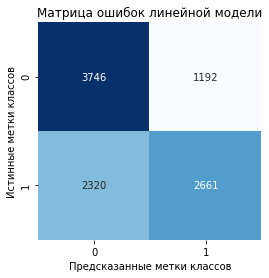

In [181]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_linear, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Предсказанные метки классов')
plt.ylabel('Истинные метки классов')
plt.title('Матрица ошибок линейной модели')
plt.show()

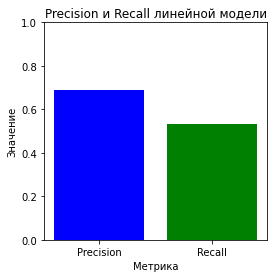

In [182]:
plt.figure(figsize=(4, 4))
plt.bar(["Precision", "Recall"], [precision_linear, recall_linear], color=['blue', 'green'])
plt.xlabel('Метрика')
plt.ylabel('Значение')
plt.title('Precision и Recall линейной модели')
plt.ylim(0, 1)
plt.show()

In [183]:
precision_linear

0.6906306773942382

Значение точности для линейной модели

In [184]:
recall_linear

0.5342300742822726

Значение полноты для линейной модели

In [185]:
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)

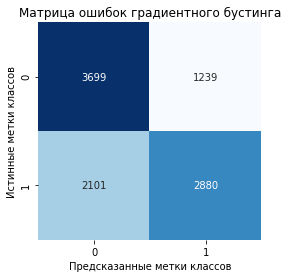

In [186]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_catboost, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Предсказанные метки классов')
plt.ylabel('Истинные метки классов')
plt.title('Матрица ошибок градиентного бустинга')
plt.show()

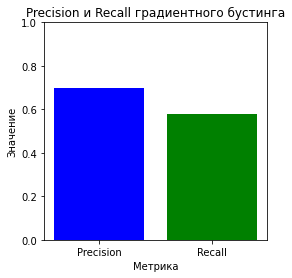

In [187]:
plt.figure(figsize=(4, 4))
plt.bar(["Precision", "Recall"], [precision_catboost, recall_catboost], color=['blue', 'green'])
plt.xlabel('Метрика')
plt.ylabel('Значение')
plt.title('Precision и Recall градиентного бустинга')
plt.ylim(0, 1)
plt.show()

In [188]:
precision_catboost

0.6991988346686089

Значение точности для градиентного бустинга

In [189]:
recall_catboost

0.578197149166834

Значение полноты для градиентного бустинга

In [190]:
cm_neuron = confusion_matrix(y_test, y_pred_neuron)
precision_neuron = precision_score(y_test, y_pred_neuron)
recall_neuron = recall_score(y_test, y_pred_neuron)

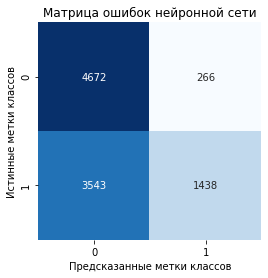

In [191]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_neuron, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Предсказанные метки классов')
plt.ylabel('Истинные метки классов')
plt.title('Матрица ошибок нейронной сети')
plt.show()

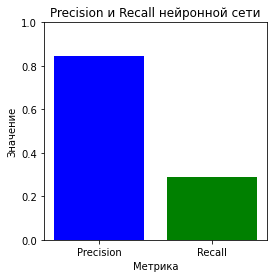

In [192]:
plt.figure(figsize=(4, 4))
plt.bar(["Precision", "Recall"], [precision_neuron, recall_neuron], color=['blue', 'green'])
plt.xlabel('Метрика')
plt.ylabel('Значение')
plt.title('Precision и Recall нейронной сети')
plt.ylim(0, 1)
plt.show()

In [193]:
precision_neuron

0.8438967136150235

Значение точности для нейронной сети

In [194]:
recall_neuron

0.28869704878538444

Значение полноты для нейронной сети

In [195]:
cm_batch = confusion_matrix(y_test, y_pred_neuron_batch)
precision_batch = precision_score(y_test, y_pred_neuron_batch)
recall_batch = recall_score(y_test, y_pred_neuron_batch)

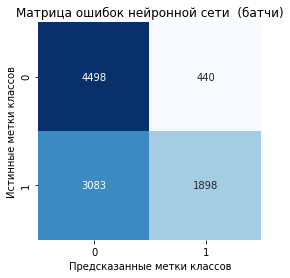

In [196]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_batch, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Предсказанные метки классов')
plt.ylabel('Истинные метки классов')
plt.title('Матрица ошибок нейронной сети  (батчи)')
plt.show()

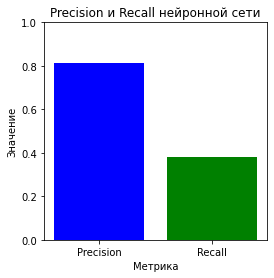

In [197]:
plt.figure(figsize=(4, 4))
plt.bar(["Precision", "Recall"], [precision_batch, recall_batch], color=['blue', 'green'])
plt.xlabel('Метрика')
plt.ylabel('Значение')
plt.title('Precision и Recall нейронной сети')
plt.ylim(0, 1)
plt.show()

In [198]:
precision_batch

0.8118049615055604

Значение точности для нейронной сети с батчами

In [199]:
recall_batch

0.3810479823328649

Значение полноты для нейронной сети с батчам

In [200]:
coefficients = best_model_linear.coef_[0]

In [201]:
feature_importance = np.abs(coefficients)

In [202]:
feature_importance.shape

(130,)

In [203]:
print("Важность признаков:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Важность признаков:
insurance_premium: 0.6490512704356942
party_sobriety: 1.4369625957548025
party_drug_physical: 1.8379276770091084
county_location: 0.508542032554443
intersection: 1.5633945543316092
weather_1: 0.31481916819369454
road_surface: 0.3932201312863488
road_condition_1: 2.847560011129284
lighting: 1.7075587689487335
collision_time: 0.32746568848274055
vehicle_type: 0.8180614522806566
vehicle_transmission: 0.28261262630139045
vehicle_age: 0.2673476262936111
day_of_week: 0.1955192123287005
month: 0.1048285948291153
season: 0.7648133906895734


Одним из наиболее важных признаков является road_condition_1 (дорожное состояние)

In [205]:
 df_work[['road_condition_1', 'at_fault']]

,road_condition_1,at_fault
0,obstruction,1
1,normal,0
2,other,1
3,normal,1
4,normal,1
...,...,...
51406,normal,1
51407,normal,0
51408,normal,1
51409,normal,0


In [206]:
df_group = df_work.groupby('road_condition_1')['at_fault'].agg('count')
df_group = df_group.drop('normal')

In [207]:
df_group

road_condition_1
construction      889
flooded            29
holes             117
loose material    110
obstruction       218
other             202
reduced width      56
Name: at_fault, dtype: int64

Text(0, 0.5, 'Количество ДТП')

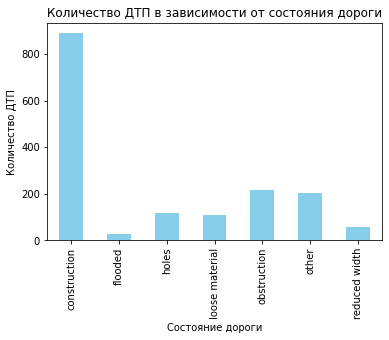

In [208]:
df_group.plot(kind='bar', color='skyblue')
plt.title('Количество ДТП в зависимости от состояния дороги')
plt.xlabel('Состояние дороги')
plt.ylabel('Количество ДТП')

Как видно из графика, если не брать в расчет нормальное состояние дороги, большое количество дтп происходит в зоне строительства.

Чтобы обезопасить водителей, предлагается в систему навигации встроить алгоритм, предупреждающий водителя, что участок его пути будет лежать через ремонтые работы, и предлагать ему объезд

## Выводы

В конечном итоге наиболее точной по метрике F1 оказалась модель градиентного бустинга. Ее значение F1 = 0.50, что нельзя назвать удовлетворительным результатом.

В целом, сказать окажется ли водитель в ДТП по имеющимся данным не возможно, поскольку в данных информация имеется обо всех поездках с ДТП. Для более качественной модели необходимо добавить в данные поездки, которые не закончились ДТП.

Имеющаяся модель по сути помогает спрогнозировать будет ли водитель виновником ДТП.

При этом входные данные не особо помогают сделать качественный прогноз, поскоьку большая часть водителей в начальном состоянии имеют примерно одинаковые исходные данные. Они трезвые и без лекарств. И как видно из сравнения важности признаков, техническое состояние автомобиля не так важно 